# Step 1: Reading and Understanding data

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
#reading the data

bike=pd.read_csv('day.csv')

In [6]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#checking the shape of dataframe

bike.shape

(730, 16)

In [8]:
# datatype of each column

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# summary of numeric columns

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#mapping season variable

bike['season']=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [11]:
#mapping variables mnth, weekday and weathersit

bike.mnth=bike.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bike.weekday=bike.weekday.map({1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri',7:'Sat'})
bike.weathersit=bike.weathersit.map({1:'Clear', 2:'Mist', 3:'Snow', 4:'Heavy rain'}) 

In [12]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,Sun,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,Mon,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2: Data Visualization

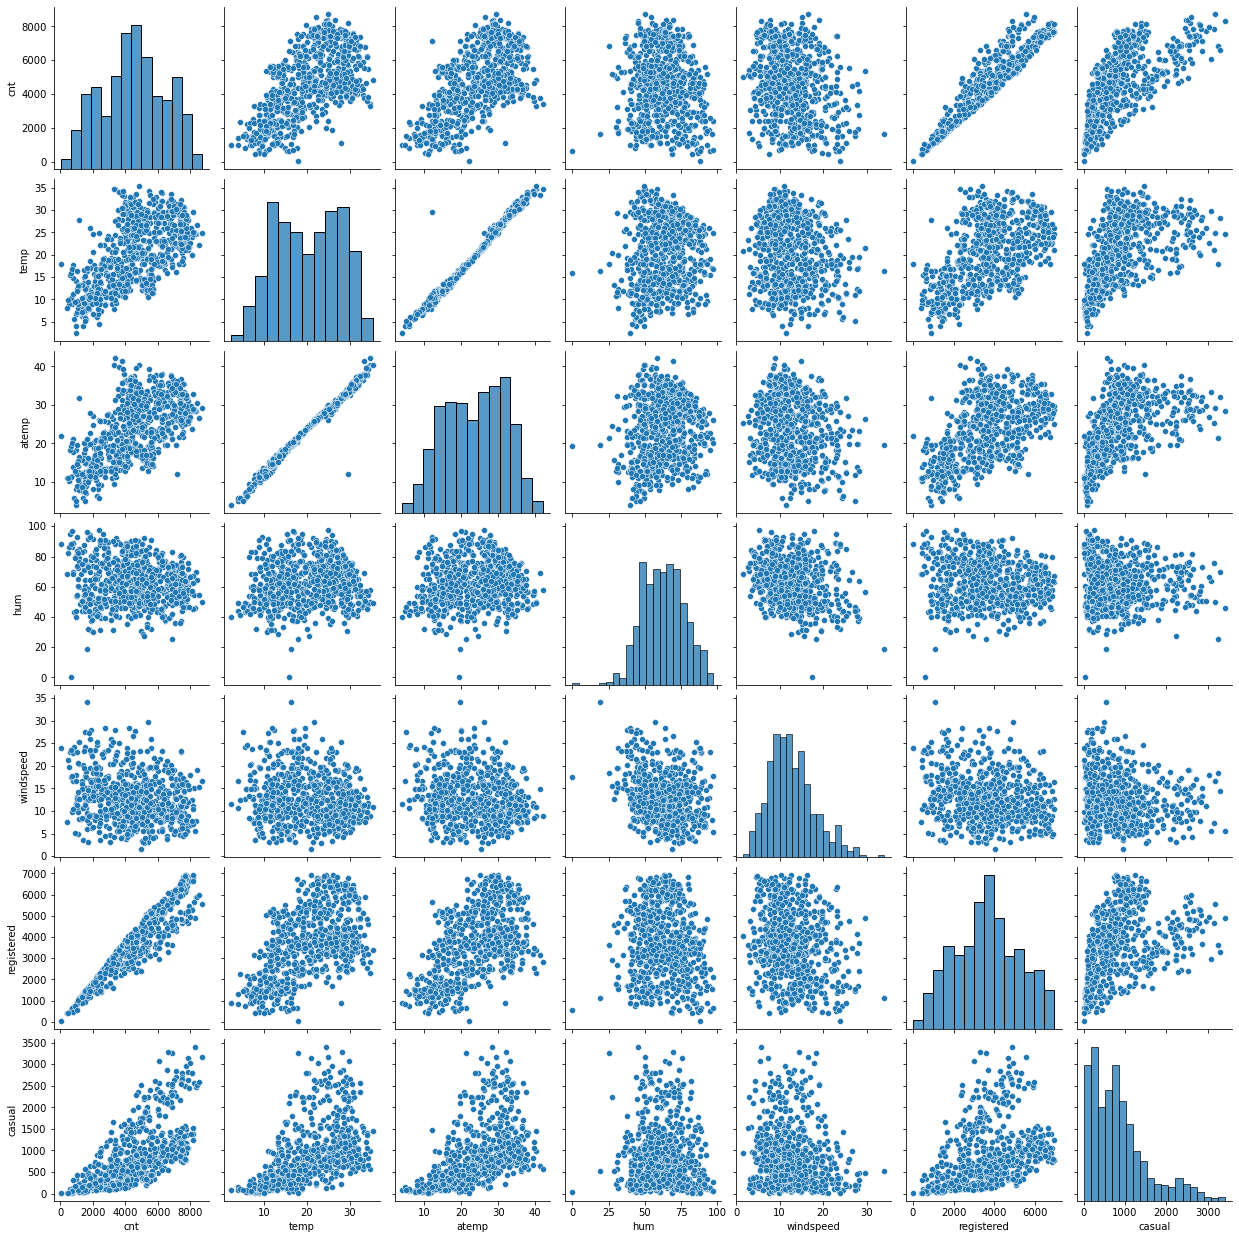

In [13]:
#pairplot for numeric variables

sns.pairplot(bike, vars=['cnt','temp','atemp','hum','windspeed','registered','casual'])

We can see that few variables are correlated to cnt and temp is more correlated to cnt.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

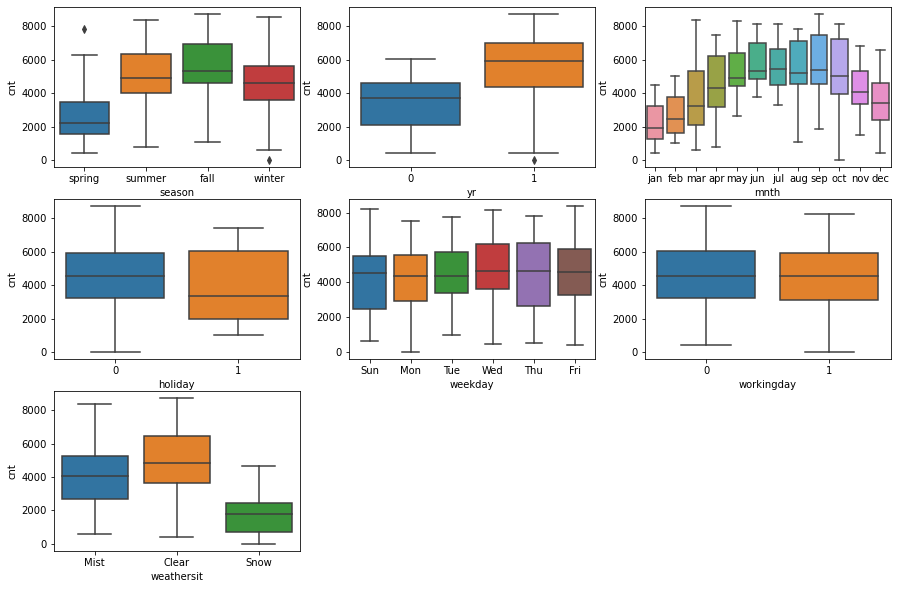

In [14]:
#checking the relation between categorical and continuous variables

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bike)

1. Fall season has more rentals.
2. Rentals are more in 2019 compared to 2018
3. Months of Aug, Sept and Oct has more rentals
4. Rentals are more during Clear weather



<AxesSubplot:>

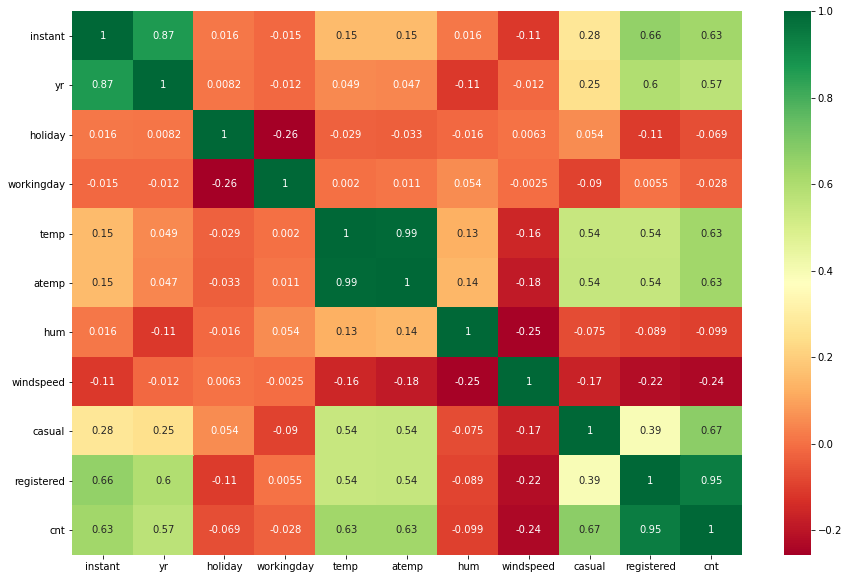

In [15]:
#Heatmap to check the correlation

plt.figure(figsize=(15,10) )
sns.heatmap(bike.corr(), cmap='RdYlGn', annot=True)

In [16]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,Sun,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,Mon,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
#dropping unwanted columns from the dataframe
bike=bike.drop(['instant','dteday','atemp','casual','registered'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Sun,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Mon,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,1600


# Step 3: Data Preparation

In [18]:
# getting dummy variables for season, mnth, weekday and weathersit

seasons=pd.get_dummies(bike.season, drop_first=True)
month=pd.get_dummies(bike.mnth, drop_first=True)
week=pd.get_dummies(bike.weekday, drop_first=True)
weather=pd.get_dummies(bike.weathersit, drop_first=True)


In [19]:
#joining all the dataframes
bike=pd.concat([bike,seasons,month,week,weather], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,nov,oct,sep,Mon,Sun,Thu,Tue,Wed,Mist,Snow
0,spring,0,jan,0,Sun,1,Mist,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,1,0
1,spring,0,jan,0,Mon,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,1,0,0,0,0


In [20]:
#dropping the columns below
bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,Mon,Sun,Thu,Tue,Wed,Mist,Snow
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

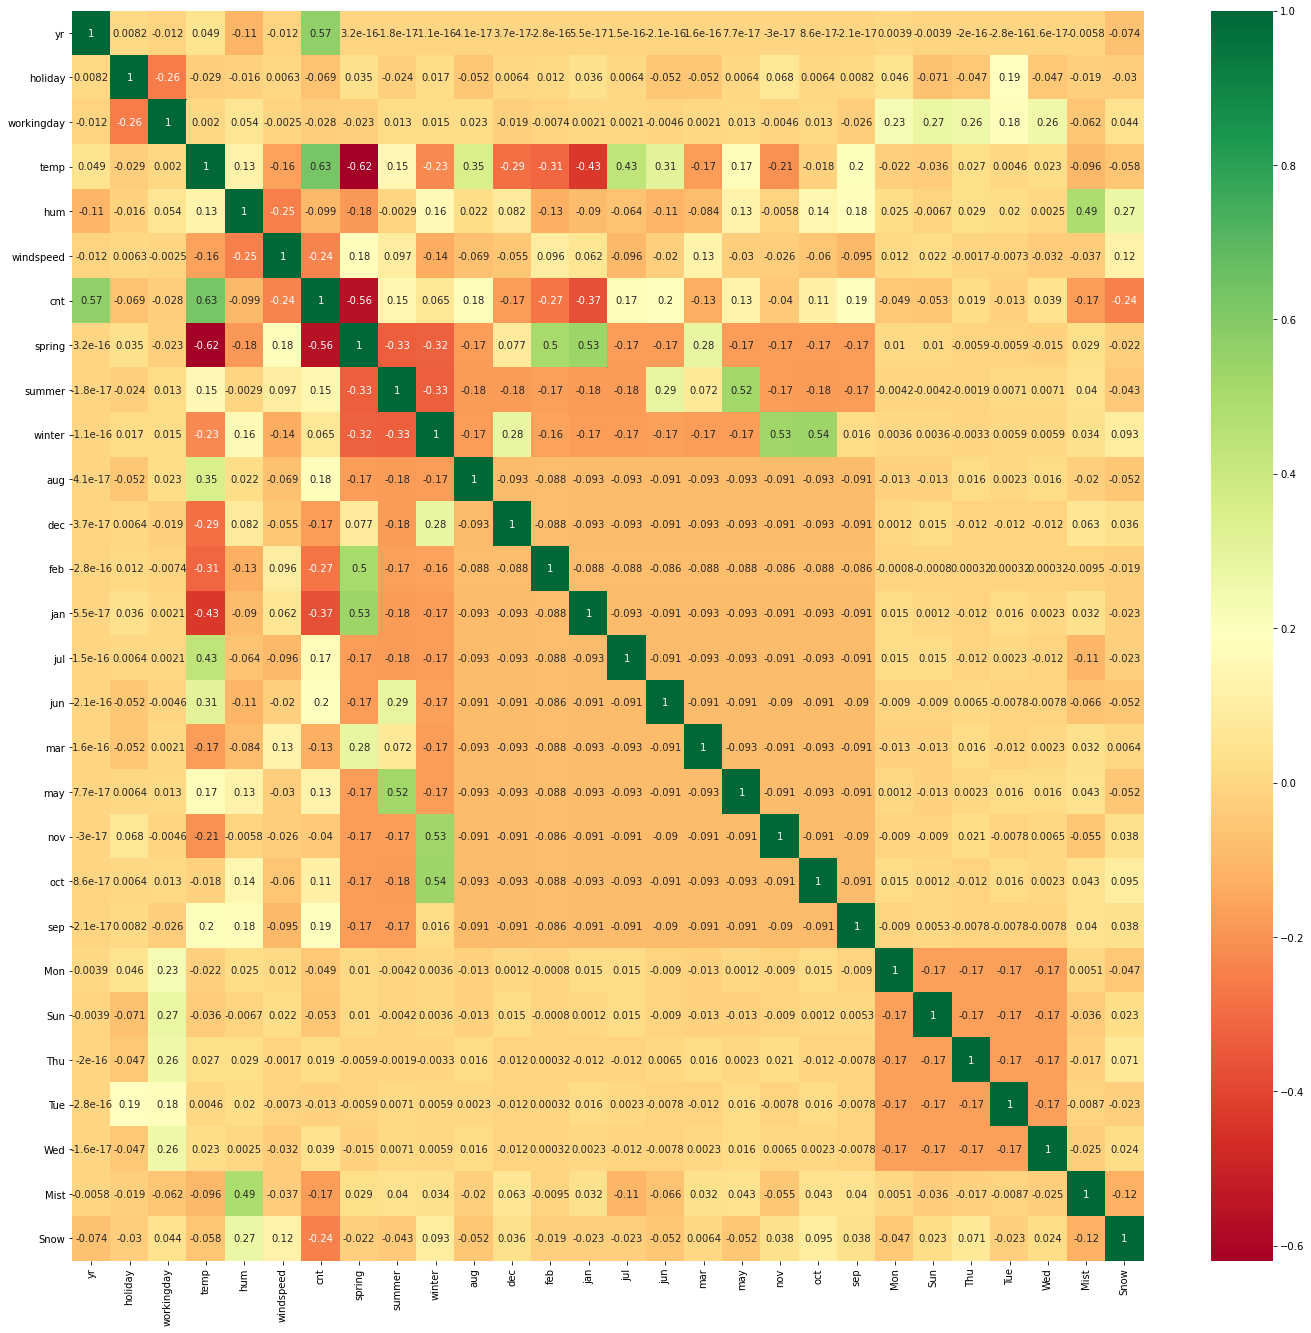

In [21]:
#heatmap to check the new correlation 
plt.figure(figsize=(24,23))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot=True)

Temp, summer, Aug, Jul, Sept has good correlation with count

# Step 4: Splitting of data into train and test set

In [22]:
#splitting of data into train and test
bike_train, bike_test=train_test_split(bike, train_size=0.70, random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 28)
(220, 28)


In [23]:
#Rescaling the features

scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,Mon,Sun,Thu,Tue,Wed,Mist,Snow
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,...,0,0,0,0,0,1,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0.312586,0,0,1,...,0,0,0,0,1,0,0,0,1,0
79,0,0,1,0.462664,0.759870,0.529881,0.236424,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [24]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,Mon,Sun,Thu,Tue,Wed,Mist,Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.086275,0.084314,0.080392,0.152941,0.154902,0.147059,0.135294,0.143137,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.281045,0.278131,0.272166,0.360284,0.362166,0.354512,0.342373,0.350557,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

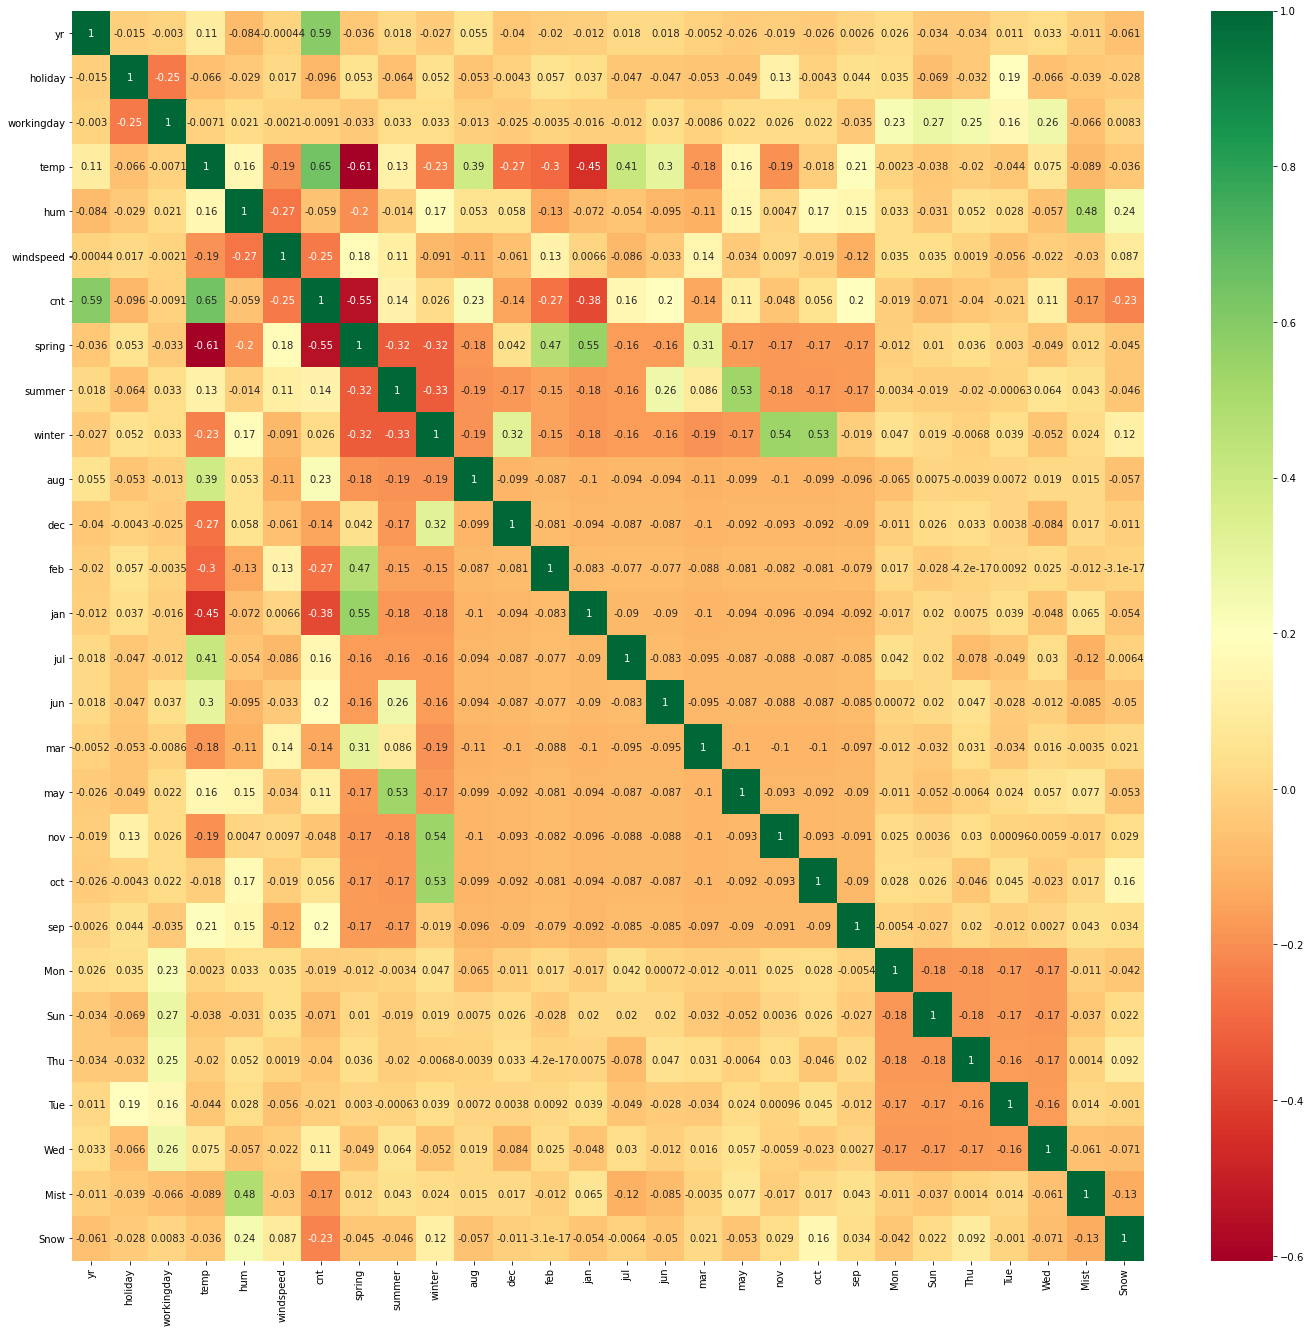

In [25]:
plt.figure(figsize=(24,23))
sns.heatmap(bike_train.corr(), cmap='RdYlGn', annot=True)

In [26]:
#Diving the data into X and y

y_train=bike_train.pop('cnt')
X_train=bike_train

# Step 5: Building a model

In [27]:
#Adding a constant
X_train_sm=sm.add_constant(X_train)

#Creating first model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

#Checking the summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          1.43e-179
Time:                        19:26:38   Log-Likelihood:                 522.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     482   BIC:                            -871.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3389      0.044      7.691      0.000       0.252       0.426
yr             0.2312      0.008     28.427      0.000       0.215       0.247
holiday       -0.1346      0.065     -2.058      0.040      -0.263      -0.006
workingday    -0.0599      0.071     -0.843      0.400      -0.200       0.080
temp           0.4401      0.047      9.413      0.000       0.348       0.532
hum           -0.1574      0.039     -4.048      0.000      -0.234      -0.081
windspeed     -0.1822      0.026     -7.001      0.000      -0.233      -0.131
spring        -0.0408      0.030     -1.352      0.177      -0.100       0.019
summer         0.0462      0.026      1.753      0.080      -0.006       0.098
winter         0.1126      0.028      3.996      0.000       0.057       0.168
aug            0.0271      0.034      0.801      0.423      -0.039       0.094
dec           -0.0443      0.034     -1.307      0.192      -0.111       0.022
feb           -0.0371      0.033     -1.116      0.265      -0.103       0.028
jan           -0.0641      0.034     -1.894      0.059      -0.131       0.002
jul           -0.0284      0.035     -0.805      0.421      -0.098       0.041
jun            0.0085      0.025      0.341      0.733      -0.041       0.058
mar            0.0010      0.025      0.039      0.969      -0.048       0.050
may            0.0248      0.021      1.166      0.244      -0.017       0.066
nov           -0.0400      0.037     -1.090      0.276      -0.112       0.032
oct            0.0055      0.036      0.153      0.879      -0.066       0.077
sep            0.0907      0.032      2.821      0.005       0.028       0.154
Mon            0.0263      0.071      0.371      0.711      -0.113       0.166
Sun            0.0278      0.071      0.390      0.697      -0.112       0.168
Thu            0.0524      0.071      0.737      0.462      -0.087       0.192
Tue            0.0422      0.070      0.600      0.549      -0.096       0.180
Wed            0.0566      0.071      0.794      0.428      -0.084       0.197
Mist          -0.0578      0.011     -5.493      0.000      -0.078      -0.037
Snow          -0.2504      0.027     -9.414      0.000      -0.303      -0.198
==============================================================================
Omnibus:                       77.022   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.686
Skew:                          -0.753   Prob(JB):                     9.71e-45
Kurtosis:                       5.697   Cond. No.                         82.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
vif=pd.DataFrame()

In [29]:
#Calculating the VIF of the model

vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,229.43
21,Sun,50.21
20,Mon,49.05
22,Thu,47.60
24,Wed,46.57
23,Tue,42.77
4,hum,38.07
3,temp,36.59
6,spring,11.70
8,winter,11.66


In [30]:
#Dropping the column with high p value

X=X_train.drop('workingday', axis=1)

In [31]:
#Creating the second model and checking for summary

X_train_lm=sm.add_constant(X)
lr_2=sm.OLS(y_train, X_train_lm)
lr_2_model=lr_2.fit()
lr_2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          1.96e-180
Time:                        19:26:39   Log-Likelihood:                 522.52
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     483   BIC:                            -876.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3370      0.044      7.660      0.000       0.251       0.423
yr             0.2316      0.008     28.535      0.000       0.216       0.248
holiday       -0.0841      0.026     -3.202      0.001      -0.136      -0.032
temp           0.4417      0.047      9.457      0.000       0.350       0.533
hum           -0.1566      0.039     -4.029      0.000      -0.233      -0.080
windspeed     -0.1828      0.026     -7.031      0.000      -0.234      -0.132
spring        -0.0406      0.030     -1.343      0.180      -0.100       0.019
summer         0.0463      0.026      1.758      0.079      -0.005       0.098
winter         0.1118      0.028      3.972      0.000       0.056       0.167
aug            0.0264      0.034      0.780      0.436      -0.040       0.093
dec           -0.0436      0.034     -1.286      0.199      -0.110       0.023
feb           -0.0366      0.033     -1.101      0.271      -0.102       0.029
jan           -0.0638      0.034     -1.884      0.060      -0.130       0.003
jul           -0.0291      0.035     -0.825      0.410      -0.098       0.040
jun            0.0079      0.025      0.315      0.753      -0.041       0.057
mar            0.0008      0.025      0.033      0.974      -0.048       0.049
may            0.0241      0.021      1.136      0.256      -0.018       0.066
nov           -0.0412      0.037     -1.124      0.262      -0.113       0.031
oct            0.0061      0.036      0.169      0.866      -0.065       0.077
sep            0.0907      0.032      2.823      0.005       0.028       0.154
Mon           -0.0324      0.013     -2.523      0.012      -0.058      -0.007
Sun           -0.0313      0.013     -2.452      0.015      -0.056      -0.006
Thu           -0.0066      0.013     -0.507      0.613      -0.032       0.019
Tue           -0.0160      0.013     -1.188      0.235      -0.043       0.010
Wed           -0.0025      0.013     -0.191      0.848      -0.028       0.023
Mist          -0.0576      0.011     -5.479      0.000      -0.078      -0.037
Snow          -0.2503      0.027     -9.412      0.000      -0.303      -0.198
==============================================================================
Omnibus:                       76.630   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.160
Skew:                          -0.755   Prob(JB):                     9.33e-44
Kurtosis:                       5.655   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Calculating the VIF for the second model

vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,38.07
2,temp,36.58
5,spring,11.70
7,winter,11.64
6,summer,6.75
17,oct,6.27
16,nov,6.05
8,aug,5.80
12,jul,5.20
11,jan,5.17


In [33]:
#Dropping the column with high p value

X=X.drop('oct',axis=1)

In [34]:
#Creating the third model and checking for summary
X_train_lm=sm.add_constant(X)
lr_3=sm.OLS(y_train, X_train_lm)
lr_3_model=lr_3.fit()
lr_3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.6
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          1.88e-181
Time:                        19:26:40   Log-Likelihood:                 522.51
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     484   BIC:                            -882.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3395      0.041      8.202      0.000       0.258       0.421
yr             0.2316      0.008     28.582      0.000       0.216       0.247
holiday       -0.0839      0.026     -3.201      0.001      -0.135      -0.032
temp           0.4414      0.047      9.466      0.000       0.350       0.533
hum           -0.1558      0.039     -4.044      0.000      -0.231      -0.080
windspeed     -0.1828      0.026     -7.037      0.000      -0.234      -0.132
spring        -0.0405      0.030     -1.344      0.179      -0.100       0.019
summer         0.0444      0.024      1.861      0.063      -0.002       0.091
winter         0.1141      0.025      4.653      0.000       0.066       0.162
aug            0.0236      0.030      0.800      0.424      -0.034       0.082
dec           -0.0481      0.021     -2.341      0.020      -0.088      -0.008
feb           -0.0395      0.029     -1.383      0.167      -0.096       0.017
jan           -0.0667      0.029     -2.289      0.022      -0.124      -0.009
jul           -0.0318      0.031     -1.017      0.310      -0.093       0.030
jun            0.0063      0.023      0.272      0.785      -0.039       0.052
mar           -0.0013      0.021     -0.063      0.949      -0.043       0.040
may            0.0231      0.020      1.135      0.257      -0.017       0.063
nov           -0.0464      0.020     -2.369      0.018      -0.085      -0.008
sep            0.0874      0.025      3.470      0.001       0.038       0.137
Mon           -0.0325      0.013     -2.533      0.012      -0.058      -0.007
Sun           -0.0313      0.013     -2.453      0.015      -0.056      -0.006
Thu           -0.0066      0.013     -0.510      0.610      -0.032       0.019
Tue           -0.0160      0.013     -1.190      0.234      -0.043       0.010
Wed           -0.0025      0.013     -0.192      0.848      -0.028       0.023
Mist          -0.0576      0.010     -5.492      0.000      -0.078      -0.037
Snow          -0.2502      0.027     -9.420      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       76.082   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.100
Skew:                          -0.751   Prob(JB):                     2.61e-43
Kurtosis:                       5.641   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Calculating the VIF for the third model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,35.72
3,hum,35.34
5,spring,11.38
7,winter,6.90
6,summer,6.20
4,windspeed,5.00
8,aug,4.86
12,jul,4.45
11,jan,4.24
10,feb,3.22


In [36]:
X=X.drop('spring', axis=1)

#Creating the fourth model and checking for summary
X_train_lm=sm.add_constant(X)
lr_4=sm.OLS(y_train, X_train_lm)
lr_4_model=lr_4.fit()
lr_4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     113.9
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          4.26e-182
Time:                        19:26:40   Log-Likelihood:                 521.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     485   BIC:                            -887.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3147      0.037      8.485      0.000       0.242       0.388
yr             0.2313      0.008     28.532      0.000       0.215       0.247
holiday       -0.0843      0.026     -3.216      0.001      -0.136      -0.033
temp           0.4492      0.046      9.701      0.000       0.358       0.540
hum           -0.1577      0.039     -4.092      0.000      -0.233      -0.082
windspeed     -0.1855      0.026     -7.158      0.000      -0.236      -0.135
summer         0.0675      0.017      4.072      0.000       0.035       0.100
winter         0.1368      0.018      7.662      0.000       0.102       0.172
aug            0.0441      0.025      1.738      0.083      -0.006       0.094
dec           -0.0520      0.020     -2.553      0.011      -0.092      -0.012
feb           -0.0554      0.026     -2.132      0.034      -0.107      -0.004
jan           -0.0821      0.027     -3.065      0.002      -0.135      -0.029
jul           -0.0118      0.028     -0.429      0.668      -0.066       0.042
jun            0.0123      0.023      0.537      0.591      -0.033       0.057
mar           -0.0120      0.020     -0.612      0.541      -0.051       0.027
may            0.0217      0.020      1.066      0.287      -0.018       0.062
nov           -0.0453      0.020     -2.314      0.021      -0.084      -0.007
sep            0.1036      0.022      4.688      0.000       0.060       0.147
Mon           -0.0326      0.013     -2.534      0.012      -0.058      -0.007
Sun           -0.0319      0.013     -2.501      0.013      -0.057      -0.007
Thu           -0.0064      0.013     -0.492      0.623      -0.032       0.019
Tue           -0.0158      0.013     -1.174      0.241      -0.042       0.011
Wed           -0.0020      0.013     -0.149      0.882      -0.028       0.024
Mist          -0.0572      0.010     -5.450      0.000      -0.078      -0.037
Snow          -0.2478      0.027     -9.344      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       74.141   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.556
Skew:                          -0.738   Prob(JB):                     1.87e-41
Kurtosis:                       5.578   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Calculating the VIF for the fourth model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,35.17
3,hum,32.85
4,windspeed,4.61
6,winter,4.47
7,aug,3.91
5,summer,3.70
11,jul,3.70
12,jun,2.55
16,sep,2.45
10,jan,2.45


In [38]:
X=X.drop('Wed', axis=1)

#Creating the fifth model and checking for summary
X_train_lm=sm.add_constant(X)
lr_5=sm.OLS(y_train, X_train_lm)
lr_5_model=lr_5.fit()
lr_5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     119.1
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          3.90e-183
Time:                        19:26:41   Log-Likelihood:                 521.55
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     486   BIC:                            -893.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3141      0.037      8.522      0.000       0.242       0.387
yr             0.2313      0.008     28.563      0.000       0.215       0.247
holiday       -0.0842      0.026     -3.216      0.001      -0.136      -0.033
temp           0.4491      0.046      9.710      0.000       0.358       0.540
hum           -0.1578      0.038     -4.101      0.000      -0.233      -0.082
windspeed     -0.1855      0.026     -7.164      0.000      -0.236      -0.135
summer         0.0674      0.017      4.073      0.000       0.035       0.100
winter         0.1367      0.018      7.668      0.000       0.102       0.172
aug            0.0441      0.025      1.741      0.082      -0.006       0.094
dec           -0.0519      0.020     -2.552      0.011      -0.092      -0.012
feb           -0.0556      0.026     -2.141      0.033      -0.107      -0.005
jan           -0.0821      0.027     -3.068      0.002      -0.135      -0.030
jul           -0.0118      0.028     -0.429      0.668      -0.066       0.042
jun            0.0123      0.023      0.542      0.588      -0.032       0.057
mar           -0.0120      0.020     -0.614      0.540      -0.051       0.026
may            0.0217      0.020      1.066      0.287      -0.018       0.062
nov           -0.0454      0.020     -2.319      0.021      -0.084      -0.007
sep            0.1036      0.022      4.693      0.000       0.060       0.147
Mon           -0.0319      0.012     -2.660      0.008      -0.055      -0.008
Sun           -0.0312      0.012     -2.620      0.009      -0.055      -0.008
Thu           -0.0057      0.012     -0.470      0.638      -0.030       0.018
Tue           -0.0152      0.013     -1.193      0.233      -0.040       0.010
Mist          -0.0571      0.010     -5.464      0.000      -0.078      -0.037
Snow          -0.2476      0.026     -9.366      0.000      -0.299      -0.196
==============================================================================
Omnibus:                       73.751   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.915
Skew:                          -0.734   Prob(JB):                     2.58e-41
Kurtosis:                       5.577   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Calculating the VIF for the fifth model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,34.94
3,hum,32.63
4,windspeed,4.61
6,winter,4.45
7,aug,3.91
11,jul,3.70
5,summer,3.68
12,jun,2.55
16,sep,2.45
10,jan,2.43


In [40]:
X=X.drop('jul', axis=1)

#Creating the sixth model and checking for summary
X_train_lm=sm.add_constant(X)
lr_6=sm.OLS(y_train, X_train_lm)
lr_6_model=lr_6.fit()
lr_6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          3.78e-184
Time:                        19:26:41   Log-Likelihood:                 521.45
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     487   BIC:                            -899.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3130      0.037      8.521      0.000       0.241       0.385
yr             0.2315      0.008     28.711      0.000       0.216       0.247
holiday       -0.0832      0.026     -3.194      0.001      -0.134      -0.032
temp           0.4384      0.039     11.256      0.000       0.362       0.515
hum           -0.1557      0.038     -4.083      0.000      -0.231      -0.081
windspeed     -0.1840      0.026     -7.178      0.000      -0.234      -0.134
summer         0.0703      0.015      4.650      0.000       0.041       0.100
winter         0.1403      0.016      8.890      0.000       0.109       0.171
aug            0.0520      0.017      3.005      0.003       0.018       0.086
dec           -0.0514      0.020     -2.536      0.012      -0.091      -0.012
feb           -0.0532      0.025     -2.099      0.036      -0.103      -0.003
jan           -0.0804      0.026     -3.041      0.002      -0.132      -0.028
jun            0.0181      0.018      0.989      0.323      -0.018       0.054
mar           -0.0093      0.019     -0.503      0.615      -0.046       0.027
may            0.0250      0.019      1.332      0.184      -0.012       0.062
nov           -0.0455      0.020     -2.327      0.020      -0.084      -0.007
sep            0.1095      0.017      6.342      0.000       0.076       0.143
Mon           -0.0320      0.012     -2.678      0.008      -0.056      -0.009
Sun           -0.0314      0.012     -2.641      0.009      -0.055      -0.008
Thu           -0.0055      0.012     -0.451      0.652      -0.029       0.018
Tue           -0.0152      0.013     -1.199      0.231      -0.040       0.010
Mist          -0.0574      0.010     -5.516      0.000      -0.078      -0.037
Snow          -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       74.916   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.036
Skew:                          -0.741   Prob(JB):                     1.99e-42
Kurtosis:                       5.615   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Calculating the VIF for the sixth model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,32.26
2,temp,19.41
4,windspeed,4.55
6,winter,3.48
5,summer,3.06
10,jan,2.39
20,Mist,2.32
0,yr,2.11
14,nov,1.92
13,may,1.90


In [42]:
X=X.drop('Thu', axis=1)

#Creating the seventh model and checking for summary
X_train_lm=sm.add_constant(X)
lr_7=sm.OLS(y_train, X_train_lm)
lr_7_model=lr_7.fit()
lr_7_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     130.9
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          3.61e-185
Time:                        19:26:42   Log-Likelihood:                 521.34
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     488   BIC:                            -905.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3121      0.037      8.516      0.000       0.240       0.384
yr             0.2316      0.008     28.746      0.000       0.216       0.247
holiday       -0.0832      0.026     -3.198      0.001      -0.134      -0.032
temp           0.4390      0.039     11.285      0.000       0.363       0.515
hum           -0.1568      0.038     -4.124      0.000      -0.232      -0.082
windspeed     -0.1842      0.026     -7.194      0.000      -0.234      -0.134
summer         0.0705      0.015      4.665      0.000       0.041       0.100
winter         0.1404      0.016      8.910      0.000       0.109       0.171
aug            0.0518      0.017      2.996      0.003       0.018       0.086
dec           -0.0518      0.020     -2.559      0.011      -0.092      -0.012
feb           -0.0533      0.025     -2.103      0.036      -0.103      -0.004
jan           -0.0806      0.026     -3.049      0.002      -0.133      -0.029
jun            0.0174      0.018      0.953      0.341      -0.018       0.053
mar           -0.0096      0.019     -0.516      0.606      -0.046       0.027
may            0.0248      0.019      1.321      0.187      -0.012       0.062
nov           -0.0459      0.020     -2.354      0.019      -0.084      -0.008
sep            0.1093      0.017      6.336      0.000       0.075       0.143
Mon           -0.0306      0.012     -2.655      0.008      -0.053      -0.008
Sun           -0.0300      0.011     -2.619      0.009      -0.052      -0.007
Tue           -0.0138      0.012     -1.122      0.262      -0.038       0.010
Mist          -0.0572      0.010     -5.508      0.000      -0.078      -0.037
Snow          -0.2488      0.026     -9.457      0.000      -0.301      -0.197
==============================================================================
Omnibus:                       74.589   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.720
Skew:                          -0.736   Prob(JB):                     1.42e-42
Kurtosis:                       5.628   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#Calculating the VIF for the seventh model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,31.93
2,temp,19.41
4,windspeed,4.54
6,winter,3.48
5,summer,3.06
10,jan,2.38
19,Mist,2.32
0,yr,2.11
14,nov,1.91
13,may,1.89


In [44]:
X=X.drop('mar', axis=1)

#Creating the eight model and checking for summary
X_train_lm=sm.add_constant(X)
lr_8=sm.OLS(y_train, X_train_lm)
lr_8_model=lr_8.fit()
lr_8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.6
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          3.47e-186
Time:                        19:26:42   Log-Likelihood:                 521.21
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     489   BIC:                            -911.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3028      0.032      9.500      0.000       0.240       0.365
yr             0.2313      0.008     28.789      0.000       0.216       0.247
holiday       -0.0830      0.026     -3.191      0.002      -0.134      -0.032
temp           0.4494      0.033     13.536      0.000       0.384       0.515
hum           -0.1584      0.038     -4.184      0.000      -0.233      -0.084
windspeed     -0.1843      0.026     -7.206      0.000      -0.235      -0.134
summer         0.0726      0.014      5.010      0.000       0.044       0.101
winter         0.1440      0.014     10.171      0.000       0.116       0.172
aug            0.0538      0.017      3.192      0.002       0.021       0.087
dec           -0.0475      0.018     -2.579      0.010      -0.084      -0.011
feb           -0.0461      0.021     -2.181      0.030      -0.088      -0.005
jan           -0.0726      0.021     -3.393      0.001      -0.115      -0.031
jun            0.0182      0.018      1.002      0.317      -0.017       0.054
may            0.0262      0.019      1.416      0.157      -0.010       0.063
nov           -0.0433      0.019     -2.301      0.022      -0.080      -0.006
sep            0.1116      0.017      6.718      0.000       0.079       0.144
Mon           -0.0304      0.012     -2.640      0.009      -0.053      -0.008
Sun           -0.0294      0.011     -2.585      0.010      -0.052      -0.007
Tue           -0.0135      0.012     -1.106      0.269      -0.038       0.011
Mist          -0.0570      0.010     -5.497      0.000      -0.077      -0.037
Snow          -0.2481      0.026     -9.450      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       73.000   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.029
Skew:                          -0.730   Prob(JB):                     1.80e-40
Kurtosis:                       5.545   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Calculating the VIF for the eight model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,26.42
2,temp,17.60
4,windspeed,4.17
6,winter,3.10
5,summer,3.03
18,Mist,2.26
0,yr,2.09
10,jan,1.99
13,nov,1.88
12,may,1.80


In [46]:
X=X.drop('jun', axis=1)

#Creating the ninth model and checking for summary
X_train_lm=sm.add_constant(X)
lr_9=sm.OLS(y_train, X_train_lm)
lr_9_model=lr_9.fit()
lr_9_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          4.67e-187
Time:                        19:26:43   Log-Likelihood:                 520.68
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2991      0.032      9.447      0.000       0.237       0.361
yr             0.2309      0.008     28.780      0.000       0.215       0.247
holiday       -0.0840      0.026     -3.231      0.001      -0.135      -0.033
temp           0.4630      0.030     15.290      0.000       0.404       0.523
hum           -0.1618      0.038     -4.290      0.000      -0.236      -0.088
windspeed     -0.1861      0.026     -7.290      0.000      -0.236      -0.136
summer         0.0771      0.014      5.593      0.000       0.050       0.104
winter         0.1437      0.014     10.154      0.000       0.116       0.172
aug            0.0494      0.016      3.036      0.003       0.017       0.081
dec           -0.0453      0.018     -2.478      0.014      -0.081      -0.009
feb           -0.0435      0.021     -2.074      0.039      -0.085      -0.002
jan           -0.0691      0.021     -3.272      0.001      -0.111      -0.028
may            0.0196      0.017      1.131      0.258      -0.014       0.054
nov           -0.0418      0.019     -2.226      0.026      -0.079      -0.005
sep            0.1089      0.016      6.644      0.000       0.077       0.141
Mon           -0.0304      0.012     -2.643      0.008      -0.053      -0.008
Sun           -0.0291      0.011     -2.559      0.011      -0.051      -0.007
Tue           -0.0134      0.012     -1.093      0.275      -0.037       0.011
Mist          -0.0567      0.010     -5.470      0.000      -0.077      -0.036
Snow          -0.2480      0.026     -9.447      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       72.757   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.468
Skew:                          -0.737   Prob(JB):                     2.91e-39
Kurtosis:                       5.485   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Calculating the VIF for the ninth model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,25.37
2,temp,14.62
4,windspeed,4.08
6,winter,3.10
5,summer,2.77
17,Mist,2.25
0,yr,2.08
10,jan,1.96
12,nov,1.87
8,dec,1.65


In [48]:
X=X.drop('Tue', axis=1)

#Creating the tenth model and checking for summary
X_train_lm=sm.add_constant(X)
lr_10=sm.OLS(y_train, X_train_lm)
lr_10_model=lr_10.fit()
lr_10_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.7
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          6.74e-188
Time:                        19:26:43   Log-Likelihood:                 520.06
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     491   BIC:                            -921.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2964      0.032      9.390      0.000       0.234       0.358
yr             0.2307      0.008     28.758      0.000       0.215       0.246
holiday       -0.0895      0.025     -3.510      0.000      -0.140      -0.039
temp           0.4644      0.030     15.347      0.000       0.405       0.524
hum           -0.1629      0.038     -4.319      0.000      -0.237      -0.089
windspeed     -0.1849      0.026     -7.250      0.000      -0.235      -0.135
summer         0.0768      0.014      5.571      0.000       0.050       0.104
winter         0.1427      0.014     10.102      0.000       0.115       0.170
aug            0.0488      0.016      3.000      0.003       0.017       0.081
dec           -0.0446      0.018     -2.441      0.015      -0.081      -0.009
feb           -0.0435      0.021     -2.075      0.039      -0.085      -0.002
jan           -0.0694      0.021     -3.288      0.001      -0.111      -0.028
may            0.0192      0.017      1.110      0.267      -0.015       0.053
nov           -0.0406      0.019     -2.165      0.031      -0.077      -0.004
sep            0.1092      0.016      6.661      0.000       0.077       0.141
Mon           -0.0277      0.011     -2.466      0.014      -0.050      -0.006
Sun           -0.0267      0.011     -2.389      0.017      -0.049      -0.005
Mist          -0.0566      0.010     -5.452      0.000      -0.077      -0.036
Snow          -0.2477      0.026     -9.434      0.000      -0.299      -0.196
==============================================================================
Omnibus:                       71.655   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.070
Skew:                          -0.721   Prob(JB):                     2.15e-39
Kurtosis:                       5.511   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Calculating the VIF for the tenth model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,25.16
2,temp,14.62
4,windspeed,4.08
6,winter,3.08
5,summer,2.77
16,Mist,2.25
0,yr,2.08
10,jan,1.95
12,nov,1.87
8,dec,1.65


In [50]:
X=X.drop('may', axis=1)

#Creating the eleventh model and checking for summary
X_train_lm=sm.add_constant(X)
lr_11=sm.OLS(y_train, X_train_lm)
lr_11_model=lr_11.fit()
lr_11_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          9.63e-189
Time:                        19:26:43   Log-Likelihood:                 519.42
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2908      0.031      9.331      0.000       0.230       0.352
yr             0.2303      0.008     28.730      0.000       0.215       0.246
holiday       -0.0901      0.025     -3.534      0.000      -0.140      -0.040
temp           0.4686      0.030     15.603      0.000       0.410       0.528
hum           -0.1568      0.037     -4.201      0.000      -0.230      -0.083
windspeed     -0.1859      0.025     -7.290      0.000      -0.236      -0.136
summer         0.0835      0.012      6.729      0.000       0.059       0.108
winter         0.1427      0.014     10.098      0.000       0.115       0.170
aug            0.0477      0.016      2.939      0.003       0.016       0.080
dec           -0.0437      0.018     -2.391      0.017      -0.080      -0.008
feb           -0.0417      0.021     -1.992      0.047      -0.083      -0.001
jan           -0.0675      0.021     -3.209      0.001      -0.109      -0.026
nov           -0.0396      0.019     -2.114      0.035      -0.076      -0.003
sep            0.1084      0.016      6.616      0.000       0.076       0.141
Mon           -0.0281      0.011     -2.501      0.013      -0.050      -0.006
Sun           -0.0272      0.011     -2.440      0.015      -0.049      -0.005
Mist          -0.0568      0.010     -5.479      0.000      -0.077      -0.036
Snow          -0.2497      0.026     -9.530      0.000      -0.301      -0.198
==============================================================================
Omnibus:                       71.020   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.053
Skew:                          -0.727   Prob(JB):                     1.18e-37
Kurtosis:                       5.427   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Calculating the VIF for the eleventh model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,25.08
2,temp,14.58
4,windspeed,4.01
6,winter,3.08
5,summer,2.30
15,Mist,2.25
0,yr,2.07
10,jan,1.95
11,nov,1.87
8,dec,1.65


In [52]:
X=X.drop('hum', axis=1)

#Creating the twelfth model and checking for summary
X_train_lm=sm.add_constant(X)
lr_12=sm.OLS(y_train, X_train_lm)
lr_12_model=lr_12.fit()
lr_12_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          4.10e-186
Time:                        19:26:44   Log-Likelihood:                 510.43
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     493   BIC:                            -914.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2110      0.025      8.399      0.000       0.162       0.260
yr             0.2341      0.008     28.905      0.000       0.218       0.250
holiday       -0.0910      0.026     -3.509      0.000      -0.142      -0.040
temp           0.4391      0.030     14.790      0.000       0.381       0.497
windspeed     -0.1576      0.025     -6.303      0.000      -0.207      -0.108
summer         0.0780      0.013      6.215      0.000       0.053       0.103
winter         0.1315      0.014      9.322      0.000       0.104       0.159
aug            0.0454      0.016      2.750      0.006       0.013       0.078
dec           -0.0515      0.018     -2.788      0.006      -0.088      -0.015
feb           -0.0475      0.021     -2.238      0.026      -0.089      -0.006
jan           -0.0776      0.021     -3.649      0.000      -0.119      -0.036
nov           -0.0397      0.019     -2.086      0.038      -0.077      -0.002
sep            0.1014      0.017      6.119      0.000       0.069       0.134
Mon           -0.0318      0.011     -2.791      0.005      -0.054      -0.009
Sun           -0.0275      0.011     -2.428      0.016      -0.050      -0.005
Mist          -0.0817      0.009     -9.434      0.000      -0.099      -0.065
Snow          -0.2935      0.024    -12.005      0.000      -0.342      -0.245
==============================================================================
Omnibus:                       69.898   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.985
Skew:                          -0.717   Prob(JB):                     5.49e-37
Kurtosis:                       5.409   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Calculating the VIF for the twelfth model
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.VIF=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.24
3,windspeed,3.98
5,winter,2.63
0,yr,2.06
4,summer,2.04
10,nov,1.82
6,aug,1.63
14,Mist,1.57
7,dec,1.42
11,sep,1.35


# Step 6: Residual analysis of the train set

In [54]:
y_train_pred=lr_12_model.predict(X_train_lm)

In [55]:
#finding the residual values
res=y_train-y_train_pred
res

576    0.066376
426   -0.052110
728   -0.165063
482   -0.102383
111   -0.107963
         ...   
578   -0.007466
53    -0.016924
350    0.089829
79    -0.090465
520    0.154723
Length: 510, dtype: float64

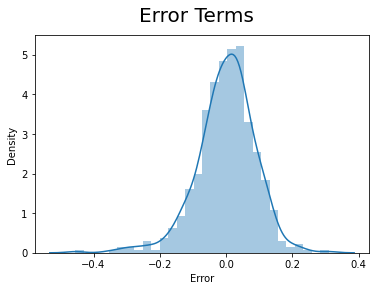

In [56]:
#plotting the histogrm for error values
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Error')
plt.show()

In [57]:
#Applying scaling on test data

num_vars=['temp','hum','windspeed','cnt']
bike_test[num_vars]=scaler.transform(bike_test[num_vars])
bike_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,Mon,Sun,Thu,Tue,Wed,Mist,Snow
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,1,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.756118,0.283397,0.757478,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,0,0,1,0.584649,0.650923,0.069510,0.495973,0,1,0,...,0,0,0,1,0,0,0,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.868615,0,0,1,...,0,1,0,0,0,0,0,1,1,0
72,0,0,1,0.331557,0.512107,0.203418,0.232858,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,Mon,Sun,Thu,Tue,Wed,Mist,Snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.072727,0.086364,0.086364,0.122727,0.118182,0.131818,0.159091,0.140909,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.260281,0.281541,0.281541,0.328872,0.323559,0.339064,0.366595,0.348721,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#dividing into X_test and y_test

y_test=bike_test.pop('cnt')
X_test=bike_test

In [60]:
#adding a constant

X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,nov,oct,sep,Mon,Sun,Thu,Tue,Wed,Mist,Snow
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,0,1,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#dropping rthe columns which was dropped for training set
X_test_sm=X_test_sm.drop(['workingday','oct','spring','Wed','jul','Thu','mar','jun','jun','Tue','may','hum'], axis=1)

In [62]:
#Making predictions using the fianl model
y_test_pred=lr_12_model.predict(X_test_sm)

# Step 7: Model Evaluation


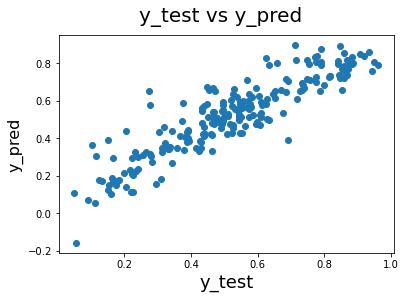

In [63]:
#plotting a scatter plot

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    
plt.show()

In [65]:
print(lr_12_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          4.10e-186
Time:                        19:30:13   Log-Likelihood:                 510.43
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     493   BIC:                            -914.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2110      0.025      8.399      0.0

# Step 8: Checking the r2 score and comparing with train set and test set

In [66]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.842629613223761
0.8106990513011199


We can see that the r2 score for training set ans test set are almost near.

The equation for the best fitted line is : 

$ count = 0.2341 * year - 0.0910 * holiday + 0.4391 * temp - 0.1576 * windspeed + 0.0780 * summer + 0.1315 * winter + 0.0454 * aug - 0.0515 * dec - 0.0475 * feb - 0.0776 * jan - 0.0397 * nov + 0.1014 * sep - 0.0318 * Mon - 0.0275 * Sun - 0.0817 * Mist - 0.2935 * Snow $